TASKS
-Anaylse transfer fees of different leagues,teams
-Look at how fees have fluctuated across seasons
-Look at how expensively different postions have fluctuated over different seasons
-Look at age and transferability of players(which teams tend to take on older players and vice versa,how fees correlate with age

In [3]:
'''
find patterns in other leagues vs the top 5 europeans leagues ie have 6 leagues,(the top 5 and others)
organise functions oop style
'''
import pandas as pd
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import math
import seaborn as sns
#sns.set()

style.use('fivethirtyeight')

#Loading the dataset
transfers = pd.read_csv("~/Documents/datasets/football/transfers.csv")

# Do some cleaning
replaceable = {"Position":{'Centre-Forward': 'Striker', 'Second Striker': 'Striker','Left Midfield':'Midfielder','Right Midfield':'Midfielder','Central Midfield':'Midfielder'},"League_from":{'Série A': 'Serie A'},"League_to":{'Série A': 'Serie A'}}
transfers.replace(replaceable, inplace=True)
transfers['log_transfer_fee'] = np.log(transfers["Transfer_fee"])
transfers['log_market_value'] = np.log(transfers["Market_value"])
transfers = transfers.drop(["Market_value","Transfer_fee"],axis=1)
transfers.log_market_value = transfers["log_market_value"].fillna(transfers["log_market_value"].median())

#Filter out some of the rows that don't add much value to the bottomline
transfers = transfers.groupby("League_from").filter(lambda x: len(x) > 30)
transfers = transfers.groupby("Team_from").filter(lambda x: len(x) > 5)
transfers = transfers.groupby("League_to").filter(lambda x: len(x) > 30)
transfers = transfers.groupby("Team_to").filter(lambda x: len(x) > 5)

print(f'{transfers.shape}\n')
print(f'{transfers.isnull().sum()}\n')
print(transfers.dtypes)

transfers.tail()

(3267, 10)

Name                0
Position            0
Age                 0
Team_from           0
League_from         0
Team_to             0
League_to           0
Season              0
log_transfer_fee    0
log_market_value    0
dtype: int64

Name                 object
Position             object
Age                   int64
Team_from            object
League_from          object
Team_to              object
League_to            object
Season               object
log_transfer_fee    float64
log_market_value    float64
dtype: object


,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,log_transfer_fee,log_market_value
4692,Giangiacomo Magnani,Centre-Back,22,Juventus,Serie A,Sassuolo,Serie A,2018-2019,15.424948,13.304685
4696,Tchê Tchê,Midfielder,25,Palmeiras,Serie A,Dynamo Kyiv,Premier Liga,2018-2019,15.384126,14.914123
4697,Silvan Widmer,Right-Back,25,Udinese Calcio,Serie A,FC Basel,Super League,2018-2019,15.319588,15.955577
4698,Yuya Osako,Striker,28,1. FC Köln,2.Bundesliga,Werder Bremen,1.Bundesliga,2018-2019,15.319588,15.319588
4699,Kyle Bartley,Centre-Back,27,Swansea,Championship,West Brom,Championship,2018-2019,15.319588,15.068274


In [2]:
to_madrid = transfers.loc[transfers['Team_to'] == 'Real Madrid']
to_barca = transfers.loc[transfers['Team_to'] == 'FC Barcelona']
to_juve = transfers.loc[transfers['Team_to'] == 'Juventus']

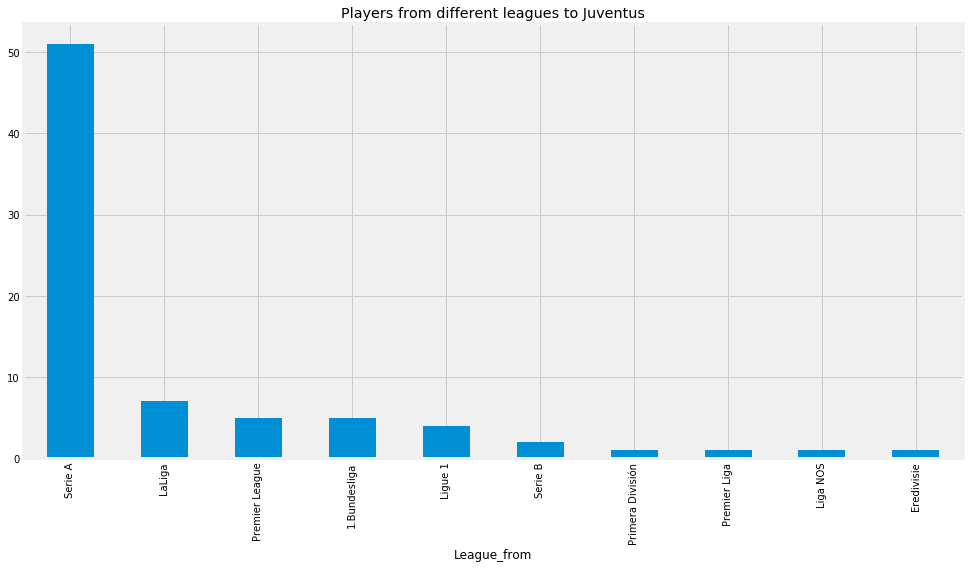

In [3]:
groupby_position = to_juve.groupby('League_from').size().sort_values(ascending=False)
groupby_position.plot.bar(title = 'Players from different leagues to Juventus',figsize=(15,8))                              
plt.show()

               Age  log_transfer_fee  log_market_value
count  3267.000000       3267.000000       3267.000000
mean     24.543618         15.909047         15.735915
std       3.170330          0.758002          0.776059
min      16.000000         13.815511         10.819778
25%      22.000000         15.424948         15.424948
50%      24.000000         15.869634         15.607270
75%      27.000000         16.380460         16.118096
max      35.000000         19.218188         18.603002


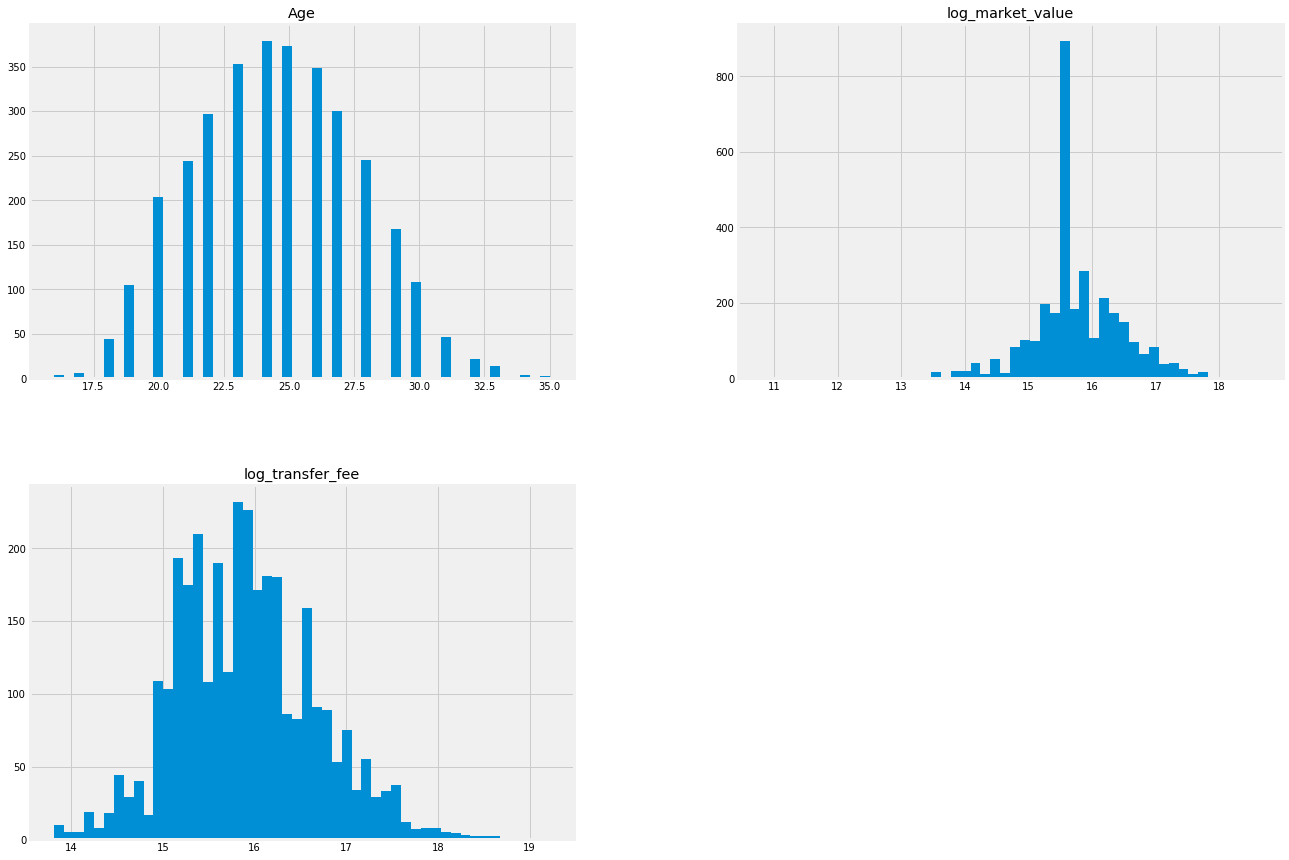

In [4]:
print(transfers.describe())
transfers.hist(bins=50,figsize=(20,15))
plt.show()

In [5]:
transfers["League_to"].value_counts()

Premier League    1066
Serie A            627
LaLiga             436
1.Bundesliga       313
Ligue 1            301
Premier Liga       216
Liga NOS            89
Süper Lig           86
Eredivisie          54
Championship        50
Super League        29
Name: League_to, dtype: int64

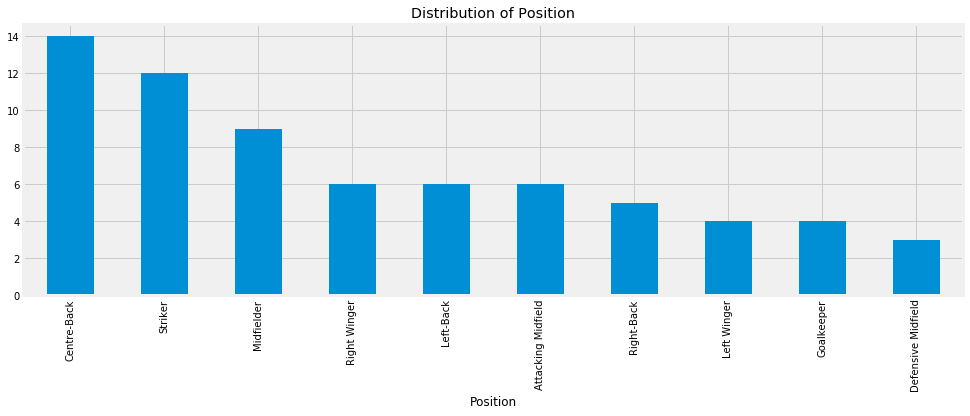

In [6]:
groupby_position = to_barca.groupby('Position').size().sort_values(ascending=False)
groupby_position.plot.bar(title = 'Distribution of Position',figsize=(15,5))
plt.show()

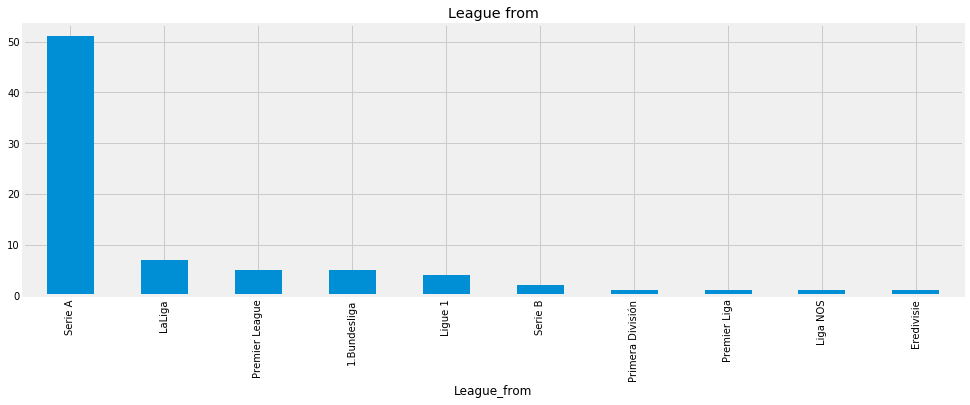

In [7]:
groupby_league_from = to_juve.groupby('League_from').size().sort_values(ascending=False)
groupby_league_from.plot.bar(title = 'League from',figsize=(15,5))
plt.show()

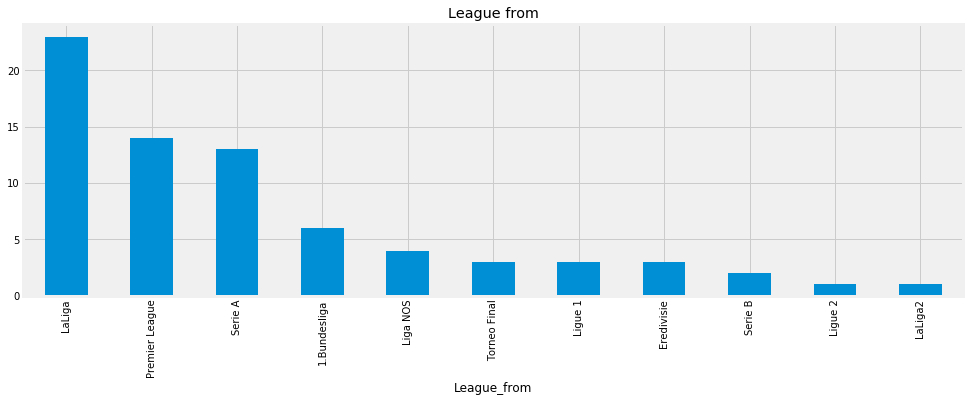

In [31]:

groupby_league_from = to_madrid.groupby('League_from').size().sort_values(ascending=False)
groupby_league_from.plot.bar(title = 'League from',figsize=(15,5))
plt.show()

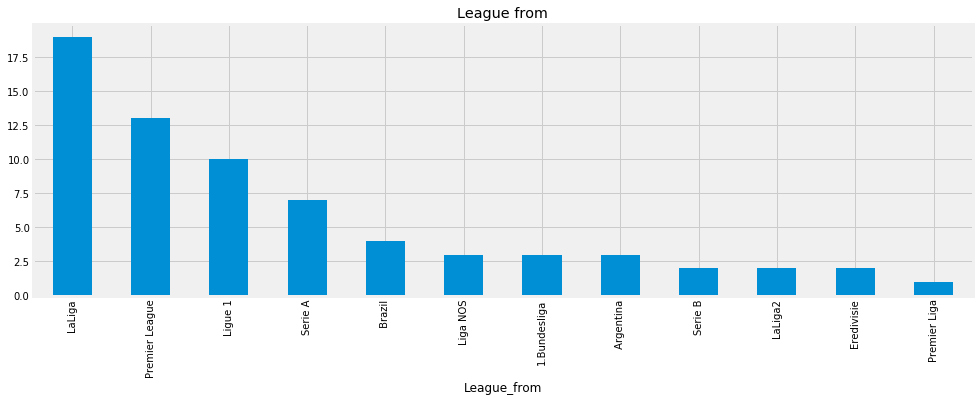

In [32]:
league_from_to_barca = to_barca.groupby('League_from').size().sort_values(ascending=False)
league_from_to_barca.plot.bar(title = 'League from',figsize=(15,5))
plt.show()

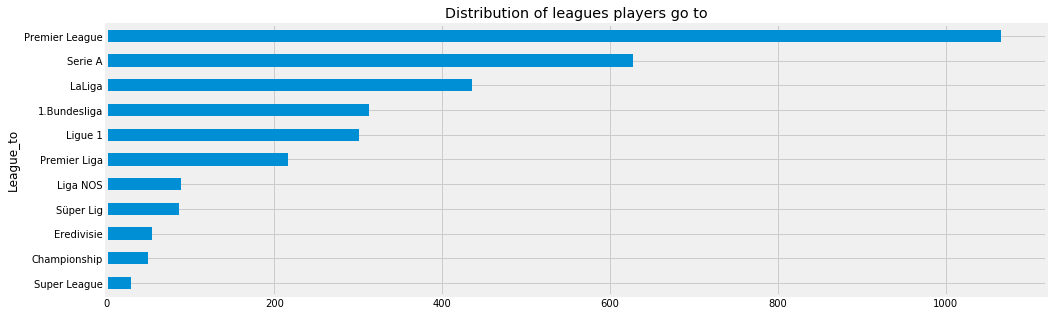

In [35]:

groupby_league_to = transfers.groupby('League_to').size().sort_values()
groupby_league_to.plot.barh(title = 'Distribution of leagues players go to',figsize=(15,5))
plt.show()

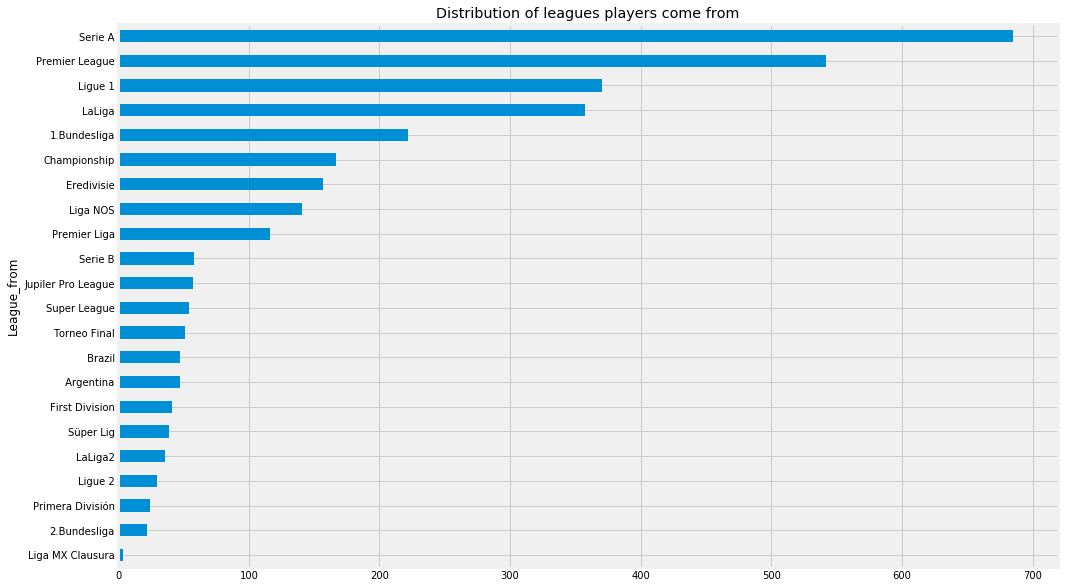

In [11]:

groupby_league_from = transfers.groupby('League_from').size().sort_values()
groupby_league_from.plot.barh(title = 'Distribution of leagues players come from',figsize=(15,10))
plt.show()

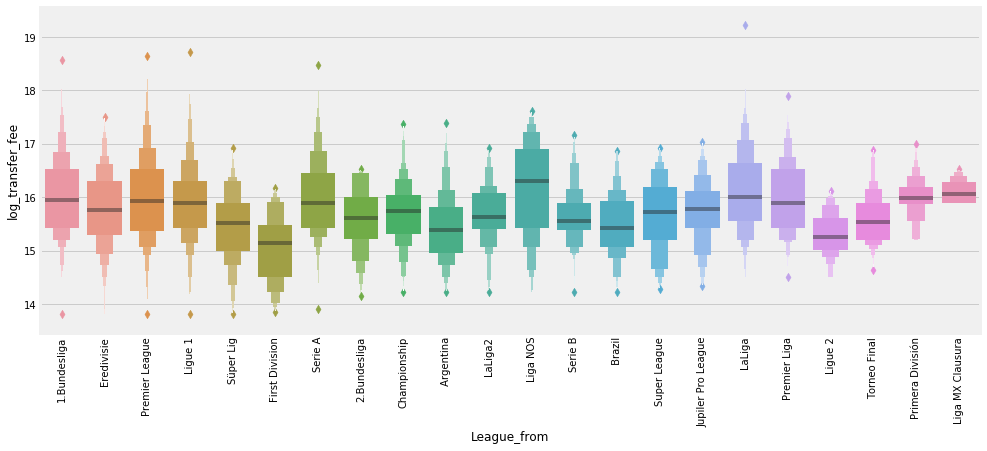

In [37]:
import seaborn as sns
# Set context to "paper"
plt.figure(figsize=(15,6))
sns.boxenplot(x="League_from", y="log_transfer_fee",data=transfers.sort_values(['log_transfer_fee']))

#sns.scatterplot('Age','Transfer_fee',data = transfers,hue='Position')
plt.xticks(rotation=90)
#show the plot
plt.show()


In [13]:

top_teams = ["Inter","Chelsea","Man City","Spurs","Liverpool","Real Madrid","FC Barcelona","AC Milan","Paris SG","Man Utd"]

In [14]:
top_transfers = transfers[transfers.Team_to.isin(top_teams)].sort_values(by="League_to")

In [15]:
transfers['log_transfer_fee'].max()

19.218187939836554

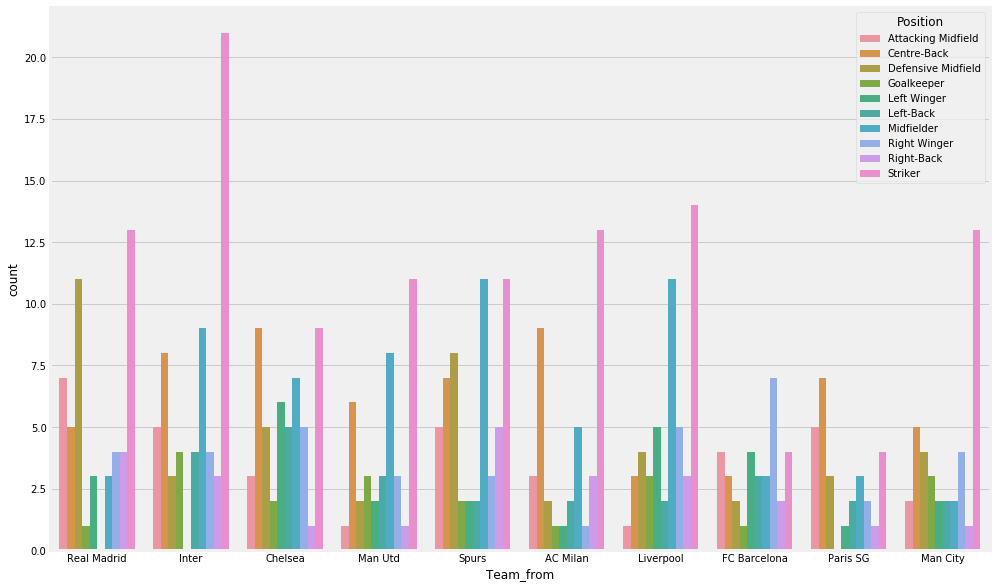

In [16]:
plt.figure(figsize=(15,10))
top_transfers = transfers[transfers.Team_from.isin(top_teams)].sort_values(by="League_from")
#sns.set_context("paper" )
#sns.set(style="darkgrid")
sns.countplot(x="Team_from",hue= 'Position',data=top_transfers.sort_values(by="Position"))
#show the plot
plt.show()
#RW

In [17]:

cost = []
values = []
for team in top_teams:
    mean_value_to_team = np.exp(transfers['log_market_value'][transfers['Team_to'] == '{}'.format(team) ].mean())
    print(f'{team}: {mean_value_to_team:.3f}')
    values.append(mean_value_to_team)
     
    mean_cost_to_team = np.exp(transfers['log_transfer_fee'][transfers['Team_to'] == '{}'.format(team) ].mean())
    print(f'Cost...{team}: {mean_cost_to_team:.3f}\n')
    cost.append(mean_cost_to_team)

print('\nIn descending order')
dataX = dict(zip(top_teams, values))
for word in sorted(dataX, key=dataX.get, reverse=True):
      print(f'{word}: {dataX[word]}')
        
print('\nIn descending order cost')
dataZ = dict(zip(top_teams, cost))
for word in sorted(dataZ, key=dataZ.get, reverse=True):
      print(f'{word}: {dataZ[word]}')


Inter: 8858184.268
Cost...Inter: 10374397.683

Chelsea: 11182050.808
Cost...Chelsea: 16411071.898

Man City: 11505465.492
Cost...Man City: 13471444.782

Spurs: 6581593.746
Cost...Spurs: 8814109.555

Liverpool: 8599921.713
Cost...Liverpool: 13283809.731

Real Madrid: 12983190.780
Cost...Real Madrid: 16035858.010

FC Barcelona: 12677333.945
Cost...FC Barcelona: 16792765.481

AC Milan: 9212951.166
Cost...AC Milan: 11398043.515

Paris SG: 9591796.111
Cost...Paris SG: 10642547.612

Man Utd: 10312745.227
Cost...Man Utd: 18021867.692


In descending order
Real Madrid: 12983190.780171128
FC Barcelona: 12677333.9454113
Man City: 11505465.491990438
Chelsea: 11182050.808277419
Man Utd: 10312745.226709291
Paris SG: 9591796.111438915
AC Milan: 9212951.165630592
Inter: 8858184.268062329
Liverpool: 8599921.712874247
Spurs: 6581593.745917814

In descending order cost
Man Utd: 18021867.691858653
FC Barcelona: 16792765.480739687
Chelsea: 16411071.89805016
Real Madrid: 16035858.009614874
Man City: 134714

In [18]:
x = pd.Series(dataX)
y = pd.DataFrame({'value': values})
y.head()

,value
0,8.858184e+06
1,1.118205e+07
2,1.150547e+07
3,6.581594e+06
4,8.599922e+06


In [26]:
func = {'log_transfer_fee': [min, max,np.mean, np.std]}
grouped = transfers.groupby('League_to').agg(func)

grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
df = np.exp(grouped)
df = df.sort_values(by='log_transfer_fee_max',ascending=False).reset_index()
df

,League_to,log_transfer_fee_min,log_transfer_fee_max,log_transfer_fee_mean,log_transfer_fee_std
0,Ligue 1,1000000.0,222000000.0,7.166656e+06,2.206846
1,LaLiga,1320000.0,125000000.0,9.697682e+06,2.280724
2,Serie A,1100000.0,117000000.0,8.579550e+06,1.965312
3,Premier League,1000000.0,105000000.0,8.939647e+06,2.244418
4,1.Bundesliga,1000000.0,43000000.0,7.666956e+06,1.989330
5,Super League,1600000.0,42000000.0,5.917742e+06,2.032251
6,Premier Liga,1500000.0,40000000.0,6.760665e+06,1.793807
7,Liga NOS,1800000.0,22000000.0,6.036638e+06,1.759094
8,Championship,1800000.0,17900000.0,6.035736e+06,1.738209
9,Süper Lig,1000000.0,17050000.0,4.760269e+06,1.775892


In [28]:
func = {'log_market_value': [min, max,np.mean, np.std]}
grouped = transfers.groupby('League_to').agg(func)

grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
df = np.exp(grouped)
df = df.sort_values(by='log_market_value_mean',ascending=False).reset_index()
df

,League_to,log_market_value_min,log_market_value_max,log_market_value_mean,log_market_value_std
0,LaLiga,800000.0,90000000.0,8.644524e+06,2.114298
1,1.Bundesliga,250000.0,45000000.0,7.461037e+06,1.904841
2,Premier League,50000.0,70000000.0,6.904409e+06,2.302264
3,Super League,1000000.0,30000000.0,6.753254e+06,1.767764
4,Serie A,200000.0,100000000.0,6.748436e+06,2.217944
5,Ligue 1,500000.0,120000000.0,6.619845e+06,2.025697
6,Süper Lig,850000.0,19000000.0,6.556451e+06,1.755336
7,Premier Liga,150000.0,42000000.0,5.598616e+06,2.055737
8,Liga NOS,200000.0,15000000.0,4.960054e+06,1.915851
9,Eredivisie,1000000.0,18000000.0,4.952288e+06,1.785996


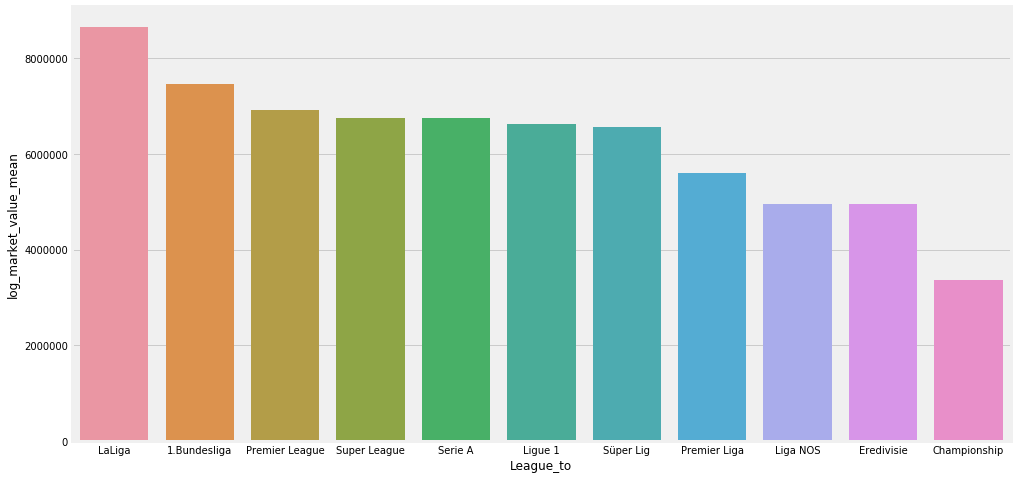

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(x="League_to",y="log_market_value_mean",data=df)

plt.show()

In [21]:
# Define the aggregation calculations
aggregations = {
    'log_transfer_fee': { # work on the "duration" column
        'average_fee': 'mean', # get mean, call result 'average_duration'
        'total': 'sum'
    },
    
    'Team_from': ["count", "max"]  
}
x = transfers[transfers['Team_to'] == 'FC Barcelona'].groupby('League_from').agg(aggregations).reset_index()
x

/home/saazi/ml/env/lib/python3.6/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


League_from log_transfer_fee             Team_from                 
                        average_fee       total     count              max
0        Argentina        16.400552   49.201656         3      River Plate
1           Brazil        16.305572   65.222288         4    Internacional
2     1.Bundesliga        16.918604   50.755812         3  Bor. M'gladbach
3       Eredivisie        15.647291   31.294583         2    PSV Eindhoven
4           LaLiga        16.734296  317.951633        19    Villarreal CF
5          LaLiga2        15.419923   30.839847         2       Real Betis
6         Liga NOS        16.586509   49.759528         3      Sporting CP
7          Ligue 1        16.498066  164.980656        10         Paris SG
8   Premier League        16.940898  220.231669        13          Man Utd
9     Premier Liga        17.034386   17.034386         1      Shakhtar D.
10         Serie A        16.966297  118.764078         7   Udinese Calcio
11         Serie B        15.939758   31.879516         2         Juventus